In [6]:
# 다항 분류 : 출력값이 softmax 함수로 인해 여러 개의 확률값으로 출력. 이때 확률값이 가장 큰 인덱스를 분류의 결과로 얻음
import numpy as np

'''
# softmax 함수 작성
def softmaxFunc(a):
    c = np.max(a) # overflow 방지용
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([1.2, 4.2, 3.1])
result = softmaxFunc(a)
print(result) # 확률값으로 출력. 
'''

'\n# softmax 함수 작성\ndef softmaxFunc(a):\n    c = np.max(a) # overflow 방지용\n    exp_a = np.exp(a - c)\n    sum_exp_a = np.sum(exp_a)\n    y = exp_a / sum_exp_a\n    return y\n\na = np.array([1.2, 4.2, 3.1])\nresult = softmaxFunc(a)\nprint(result) # 확률값으로 출력. \n'

In [5]:
from keras.models import Sequential
from keras.layers import Input, Dense, BatchNormalization
from keras.utils import to_categorical # OneHotEncoding 지원
import matplotlib.pyplot as plt

np.random.seed(0)

# data 준비
xdata = np.random.random((1000,12)) # 시험점수라고 가정
ydata = np.random.randint(5, size=(1000,1))
print(xdata[:5]) # feature
print(ydata[:5].ravel()) # label - 정수를 OneHotEncoding 다섯가지 형태로 출력될 수 있도록 모양 변경해준다.

ydata = to_categorical(ydata, num_classes=5)
print(ydata[:5])

# print([np.argmax(i) for i in ydata[:5]]) # OneHotEncoding 값 원복

[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
  0.77815675 0.87001215 0.97861834 0.79915856 0.46147936 0.78052918]
 [0.11827443 0.63992102 0.14335329 0.94466892 0.52184832 0.41466194
  0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355 ]
 [0.61209572 0.616934   0.94374808 0.6818203  0.3595079  0.43703195
  0.6976312  0.06022547 0.66676672 0.67063787 0.21038256 0.1289263 ]
 [0.31542835 0.36371077 0.57019677 0.43860151 0.98837384 0.10204481
  0.20887676 0.16130952 0.65310833 0.2532916  0.46631077 0.24442559]]
[0 3 0 4 4]
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [7]:
# 모델
model = Sequential([
    Input(shape=(12,)),
    Dense(32, activation='elu'),
    BatchNormalization(),
    Dense(16, activation='elu'),
    BatchNormalization(),
    Dense(5, activation='softmax')    
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
print(f'learning rate : {model.optimizer.learning_rate.numpy()}')
# adam/rmsprop learning rate 기본값 : 0.001

history = model.fit(xdata, ydata, epochs=1000, batch_size=64, verbose=2)

model_eval = model.evaluate(xdata, ydata)

print(f'모델 평가 결과 : {model_eval}')

learning rate : 0.009999999776482582
Epoch 1/1000


2025-09-16 17:58:10.634586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


16/16 - 2s - 134ms/step - accuracy: 0.1900 - loss: 2.1522
Epoch 2/1000
16/16 - 0s - 13ms/step - accuracy: 0.1980 - loss: 1.9730
Epoch 3/1000
16/16 - 0s - 12ms/step - accuracy: 0.2040 - loss: 1.8461
Epoch 4/1000
16/16 - 0s - 12ms/step - accuracy: 0.2100 - loss: 1.7724
Epoch 5/1000
16/16 - 0s - 12ms/step - accuracy: 0.2270 - loss: 1.7220
Epoch 6/1000
16/16 - 0s - 12ms/step - accuracy: 0.2210 - loss: 1.6936
Epoch 7/1000
16/16 - 0s - 12ms/step - accuracy: 0.2090 - loss: 1.6831
Epoch 8/1000
16/16 - 0s - 13ms/step - accuracy: 0.2280 - loss: 1.6622
Epoch 9/1000
16/16 - 0s - 12ms/step - accuracy: 0.2110 - loss: 1.6588
Epoch 10/1000
16/16 - 0s - 12ms/step - accuracy: 0.2130 - loss: 1.6498
Epoch 11/1000
16/16 - 0s - 12ms/step - accuracy: 0.2310 - loss: 1.6426
Epoch 12/1000
16/16 - 0s - 12ms/step - accuracy: 0.2150 - loss: 1.6411
Epoch 13/1000
16/16 - 0s - 12ms/step - accuracy: 0.2320 - loss: 1.6275
Epoch 14/1000
16/16 - 0s - 12ms/step - accuracy: 0.2280 - loss: 1.6246
Epoch 15/1000
16/16 - 0s - 

KeyboardInterrupt: 

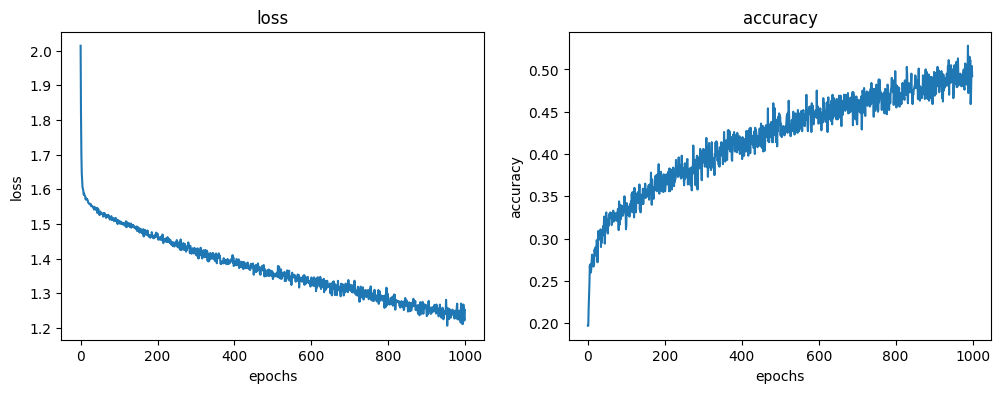

In [23]:
# 시각화 loss, acc
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(history.history['loss'])
ax1.set_title('loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')

ax2.plot(history.history['accuracy'])
ax2.set_title('accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')

plt.show()


In [24]:
# 분류 예측 결과 보기
np.set_printoptions(precision=5)
print(f'예측값 : {model.predict(xdata[:5])}')
print(f'예측값 : {np.argmax(model.predict(xdata[:5]), axis=1)}')

print(f'실제값 : {ydata[:5]}')
print(f'실제값 : {[int(i) for i in np.argmax(ydata[:5], axis=1)]}')

# 새로운 값 예측
x_new = np.random.random([1,12])
print(x_new)
new_pred = model.predict(x_new)
print(f'분류 결과 : {new_pred}')
print(f'합 : {np.sum(new_pred)}')

# 레이블에 해당하는 과목명 출력
classes = np.array(['국어','영어','수학','과학','체육'])
print(f'예측값 : {classes[np.argmax(new_pred, axis=1)]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
예측값 : [[0.56224 0.21453 0.06028 0.07558 0.08736]
 [0.10663 0.05294 0.31438 0.50679 0.01925]
 [0.36468 0.2958  0.15113 0.06513 0.12325]
 [0.09106 0.29426 0.03969 0.15194 0.42305]
 [0.09206 0.25431 0.16745 0.08161 0.40456]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
예측값 : [0 3 0 4 4]
실제값 : [[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
실제값 : [0, 3, 0, 4, 4]
[[0.3552  0.55778 0.9126  0.32953 0.93238 0.76867 0.72668 0.80576 0.54393
  0.20571 0.98969 0.28327]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
분류 결과 : [[0.07944 0.27056 0.18253 0.04555 0.42192]]
합 : 1.0
예측값 : ['체육']
